# RAMP: Purchasing Intention prediction for online shoppers

*Ly An CHHAY, Haocheng LIU, Aymane Rahmoune, Mohammed Jawhar, Wiam Adnan, Nasr El Hamzaoui*

This notebook is part of a project aiming to create a Data Science challenge on the RAMP platform, for the M2 DS (2023/2024) Datacamp course.

<div align="center">
  <img src="./logo_ip-paris.png"/>
</div>

In the current dynamic landscape of retail and e-commerce, the integration of Artificial Intelligence and recommender systems has significantly boosted sales performance and revolutionized marketing strategies.  Particularly, to engage consumers, it is important to understand their preferences and propose correspondly special deals and promotions. Historically, such offers were indiscriminately proposed to all website visitors, without consideration of individual interests. But then, after recognizing the inefficiency of this approach, online retailers began to leverage detailed analysis of visitor behavior to identify potential buyers. By deploying recommendation systems, retailers have been able to target these potential customers more directly with personalized offers through email or phone, hoping to bring them back to buy something.

Recently, the demand for immediate, real-time solutions has led to the rise of a proactive approach. Instead of waiting until after someone visits a site to guess if they might want to buy something, this method tries to figure it out while they're still browsing to enhance conversion rates. It is like having a clever salesperson who knows who's just browsing and who's ready to buy, and offers them deals right then and there to get them to buy. 

In other words, this approach aim to detect users with high purchasing intention as soon as they connect to the e-commerce website and to offer content only to those who intend to complete a transaction. The advantage behind that is to avoid the risk of losing potential visitors who sometimes disconnect for trivial reasons (reception of a phone call, being disconnected for a while, etc.). In this callenge, we aim to design the first part of such a recommendation systems : a model able to detect wether a visitor is willing to buy something from the ecommerce platform or not.

## Dataset Description

We will use a dataset detailing 12330 sessions, each of a different user in a one year period. It comprises 10 numerical and 8 categorical attributes, with the 'Revenue' attribute serving as the class label. Metrics such as "Administrative," "Administrative Duration," "Informational," "Informational Duration," "Product Related," and "Product Related Duration" quantify the number of pages visited and the time spent on different page categories during a session. These values are derived from the URL information of the visited pages, dynamically updated in real-time as users navigate through the site. The features "Bounce Rate," "Exit Rate," and "Page Value" correspond to metrics measured by "Google Analytics" for each page in the e-commerce site. "Bounce Rate" indicates the percentage of visitors who enter a page and leave without triggering additional requests to the analytics server. "Exit Rate" calculates the percentage of pageviews that were the last in a session. Meanwhile, "Page Value" represents the average value of a page visited before completing an e-commerce transaction. The "Special Day" feature gauges the proximity of site visits to specific occasions (e.g., Mother’s Day, Valentine's Day), where transactions are more likely to occur. This attribute's value considers e-commerce dynamics, such as the duration between the order date and delivery date. For instance, around Valentine’s Day, the value is nonzero between February 2 and February 12, zero before and after unless close to another special day, reaching a maximum of 1 on February 8. Additionally, the dataset includes information on the operating system, browser, region, traffic type, visitor type (returning or new), a Boolean indicator for weekend visits, and the month of the year.

The dataset was taken from:
Sakar,C. and Kastro,Yomi. (2018). Online Shoppers Purchasing Intention Dataset. UCI Machine Learning Repository. https://doi.org/10.24432/C5F88Q.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.base import BaseEstimator
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('data/online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
'''train, test = train_test_split(df, test_size=0.2, stratify=df['Revenue'], random_state=42)
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)'''

'''train.to_csv('data/train.csv', index=False)
test.to_csv('data/test.csv', index=False)'''


"train.to_csv('data/train.csv', index=False)\ntest.to_csv('data/test.csv', index=False)"

In [5]:
df[['OperatingSystems', 'Browser', 'Region', 'TrafficType']] = df[['OperatingSystems', 'Browser', 'Region', 'TrafficType']].astype('object')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

In [6]:
df.duplicated().sum()

125

In [7]:
df.drop_duplicates(inplace=True, keep='first')

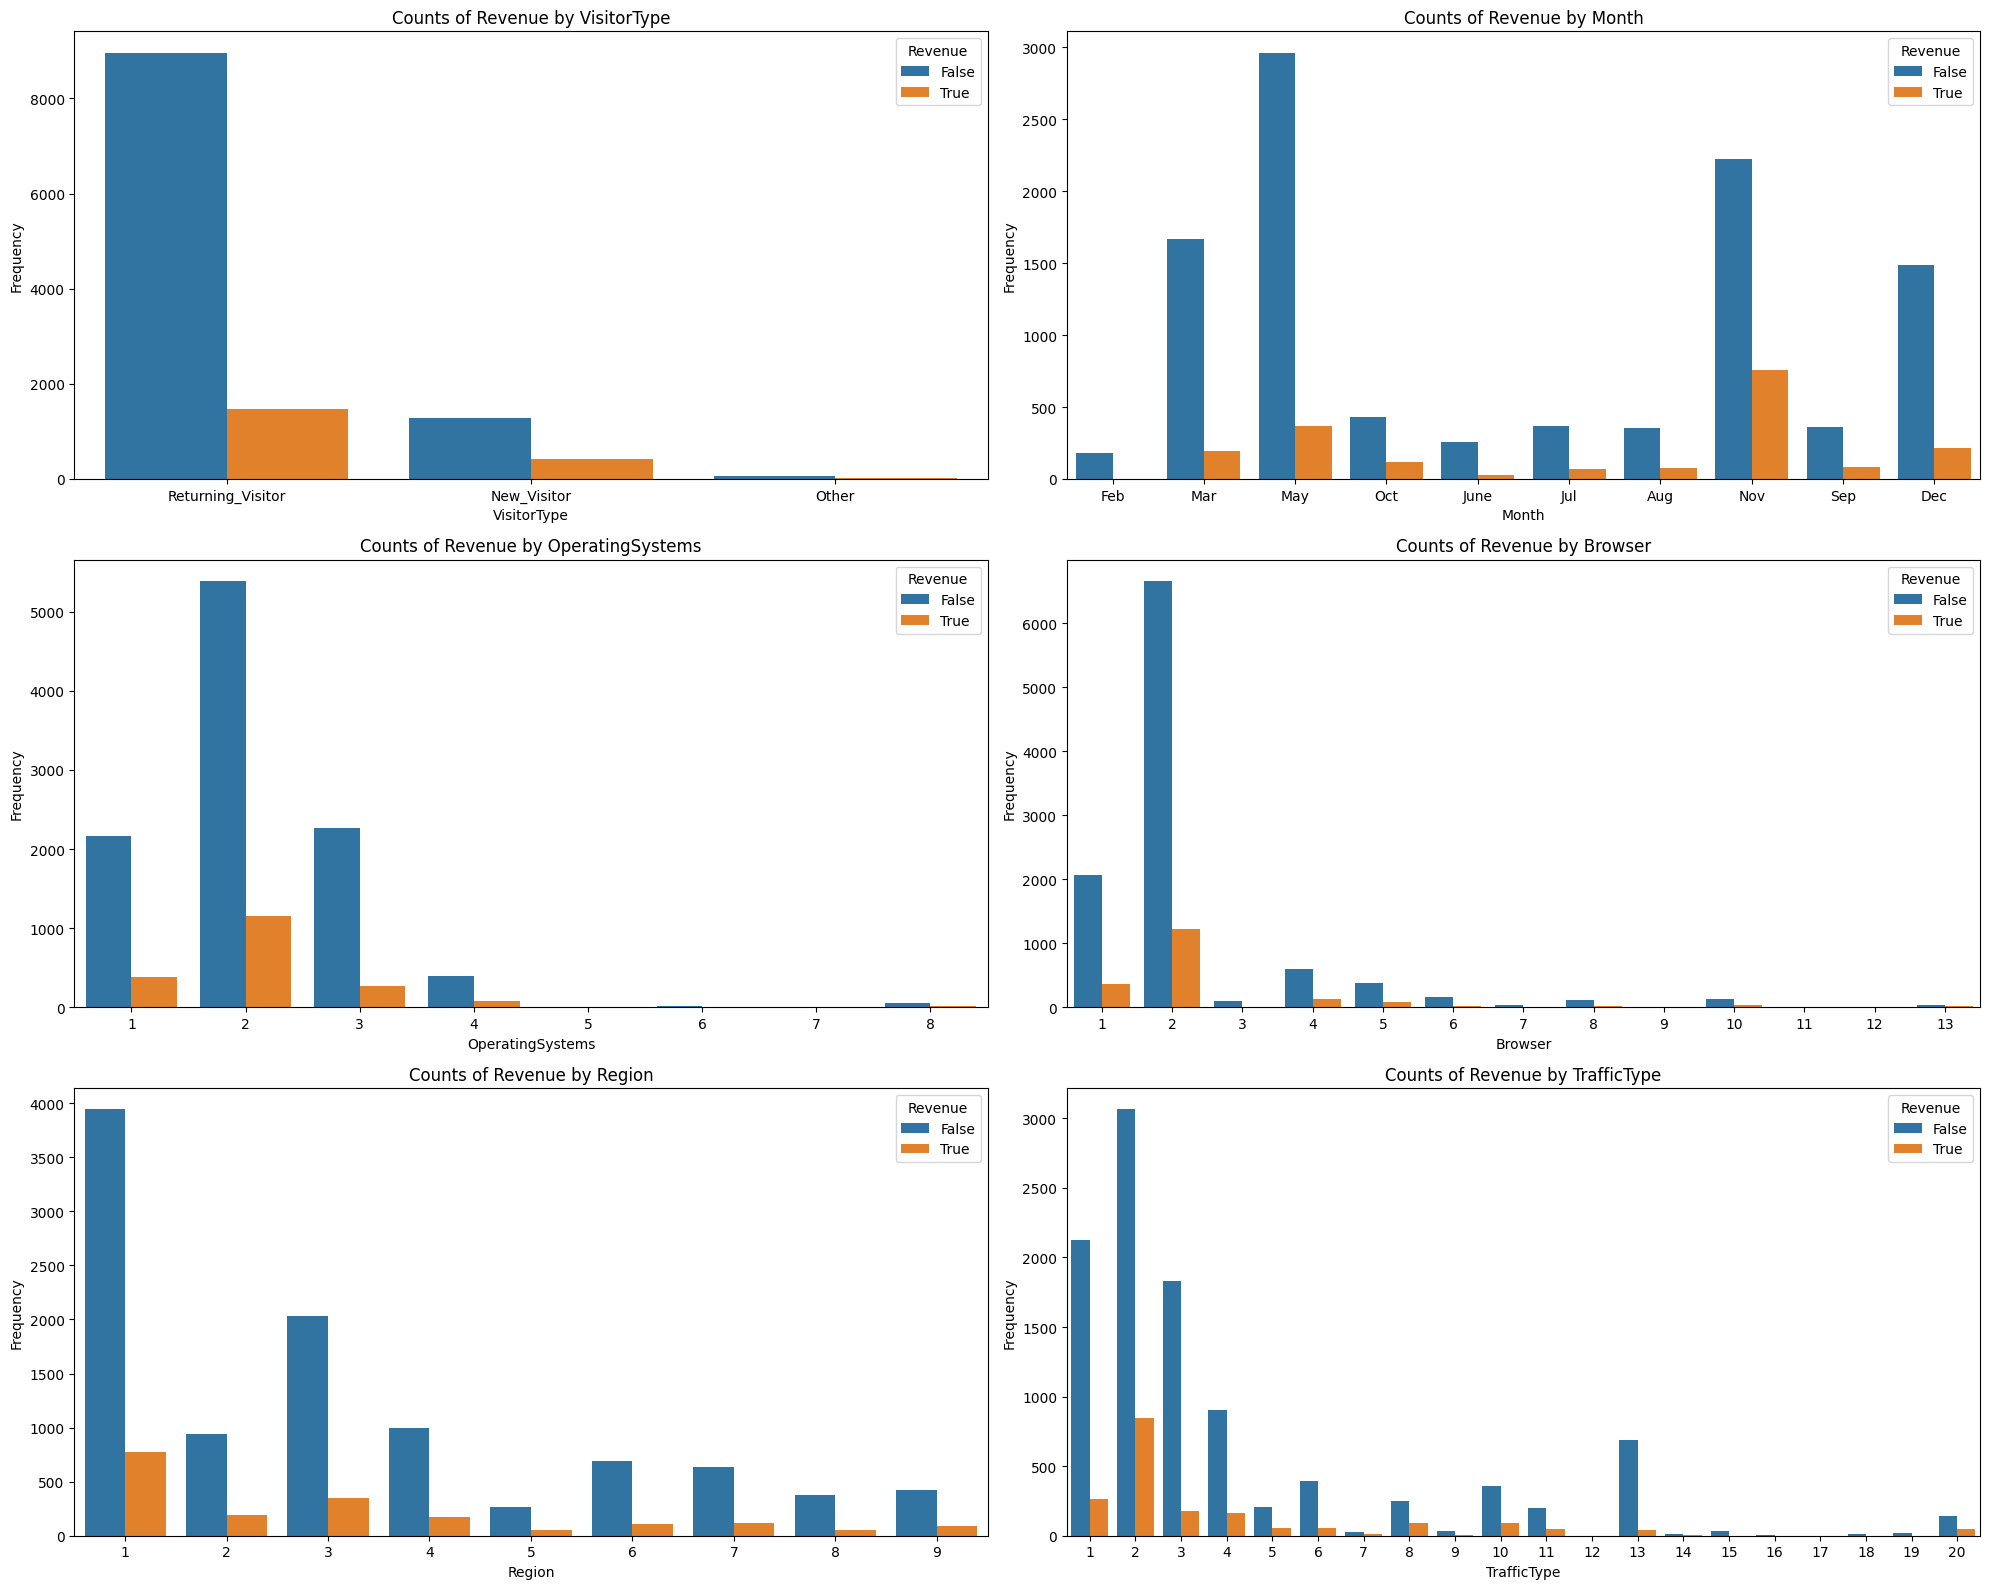

In [8]:
fig, axes = plt.subplots(3, 2, figsize=(20, 16))

for col, ax in zip(['VisitorType', 'Month','OperatingSystems', 'Browser', 'Region', 'TrafficType'], axes.flatten()):
    sns.countplot(data=df, x=col, ax=ax, hue='Revenue')
    ax.set_title(f'Counts of Revenue by {col}')
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [9]:
df['Revenue'].value_counts(normalize = True)

Revenue
False    0.843671
True     0.156329
Name: proportion, dtype: float64

<Axes: xlabel='Revenue', ylabel='count'>

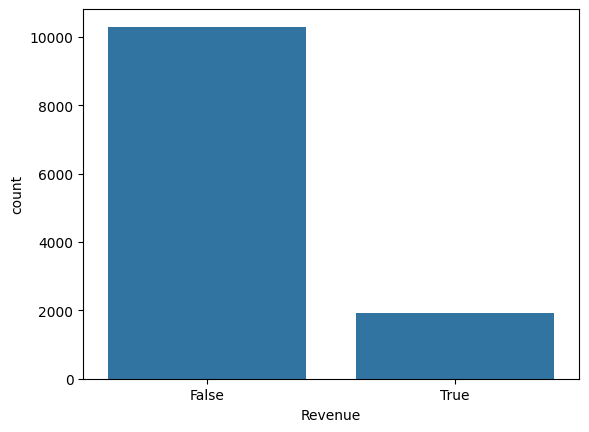

In [10]:
sns.barplot(df['Revenue'].value_counts())

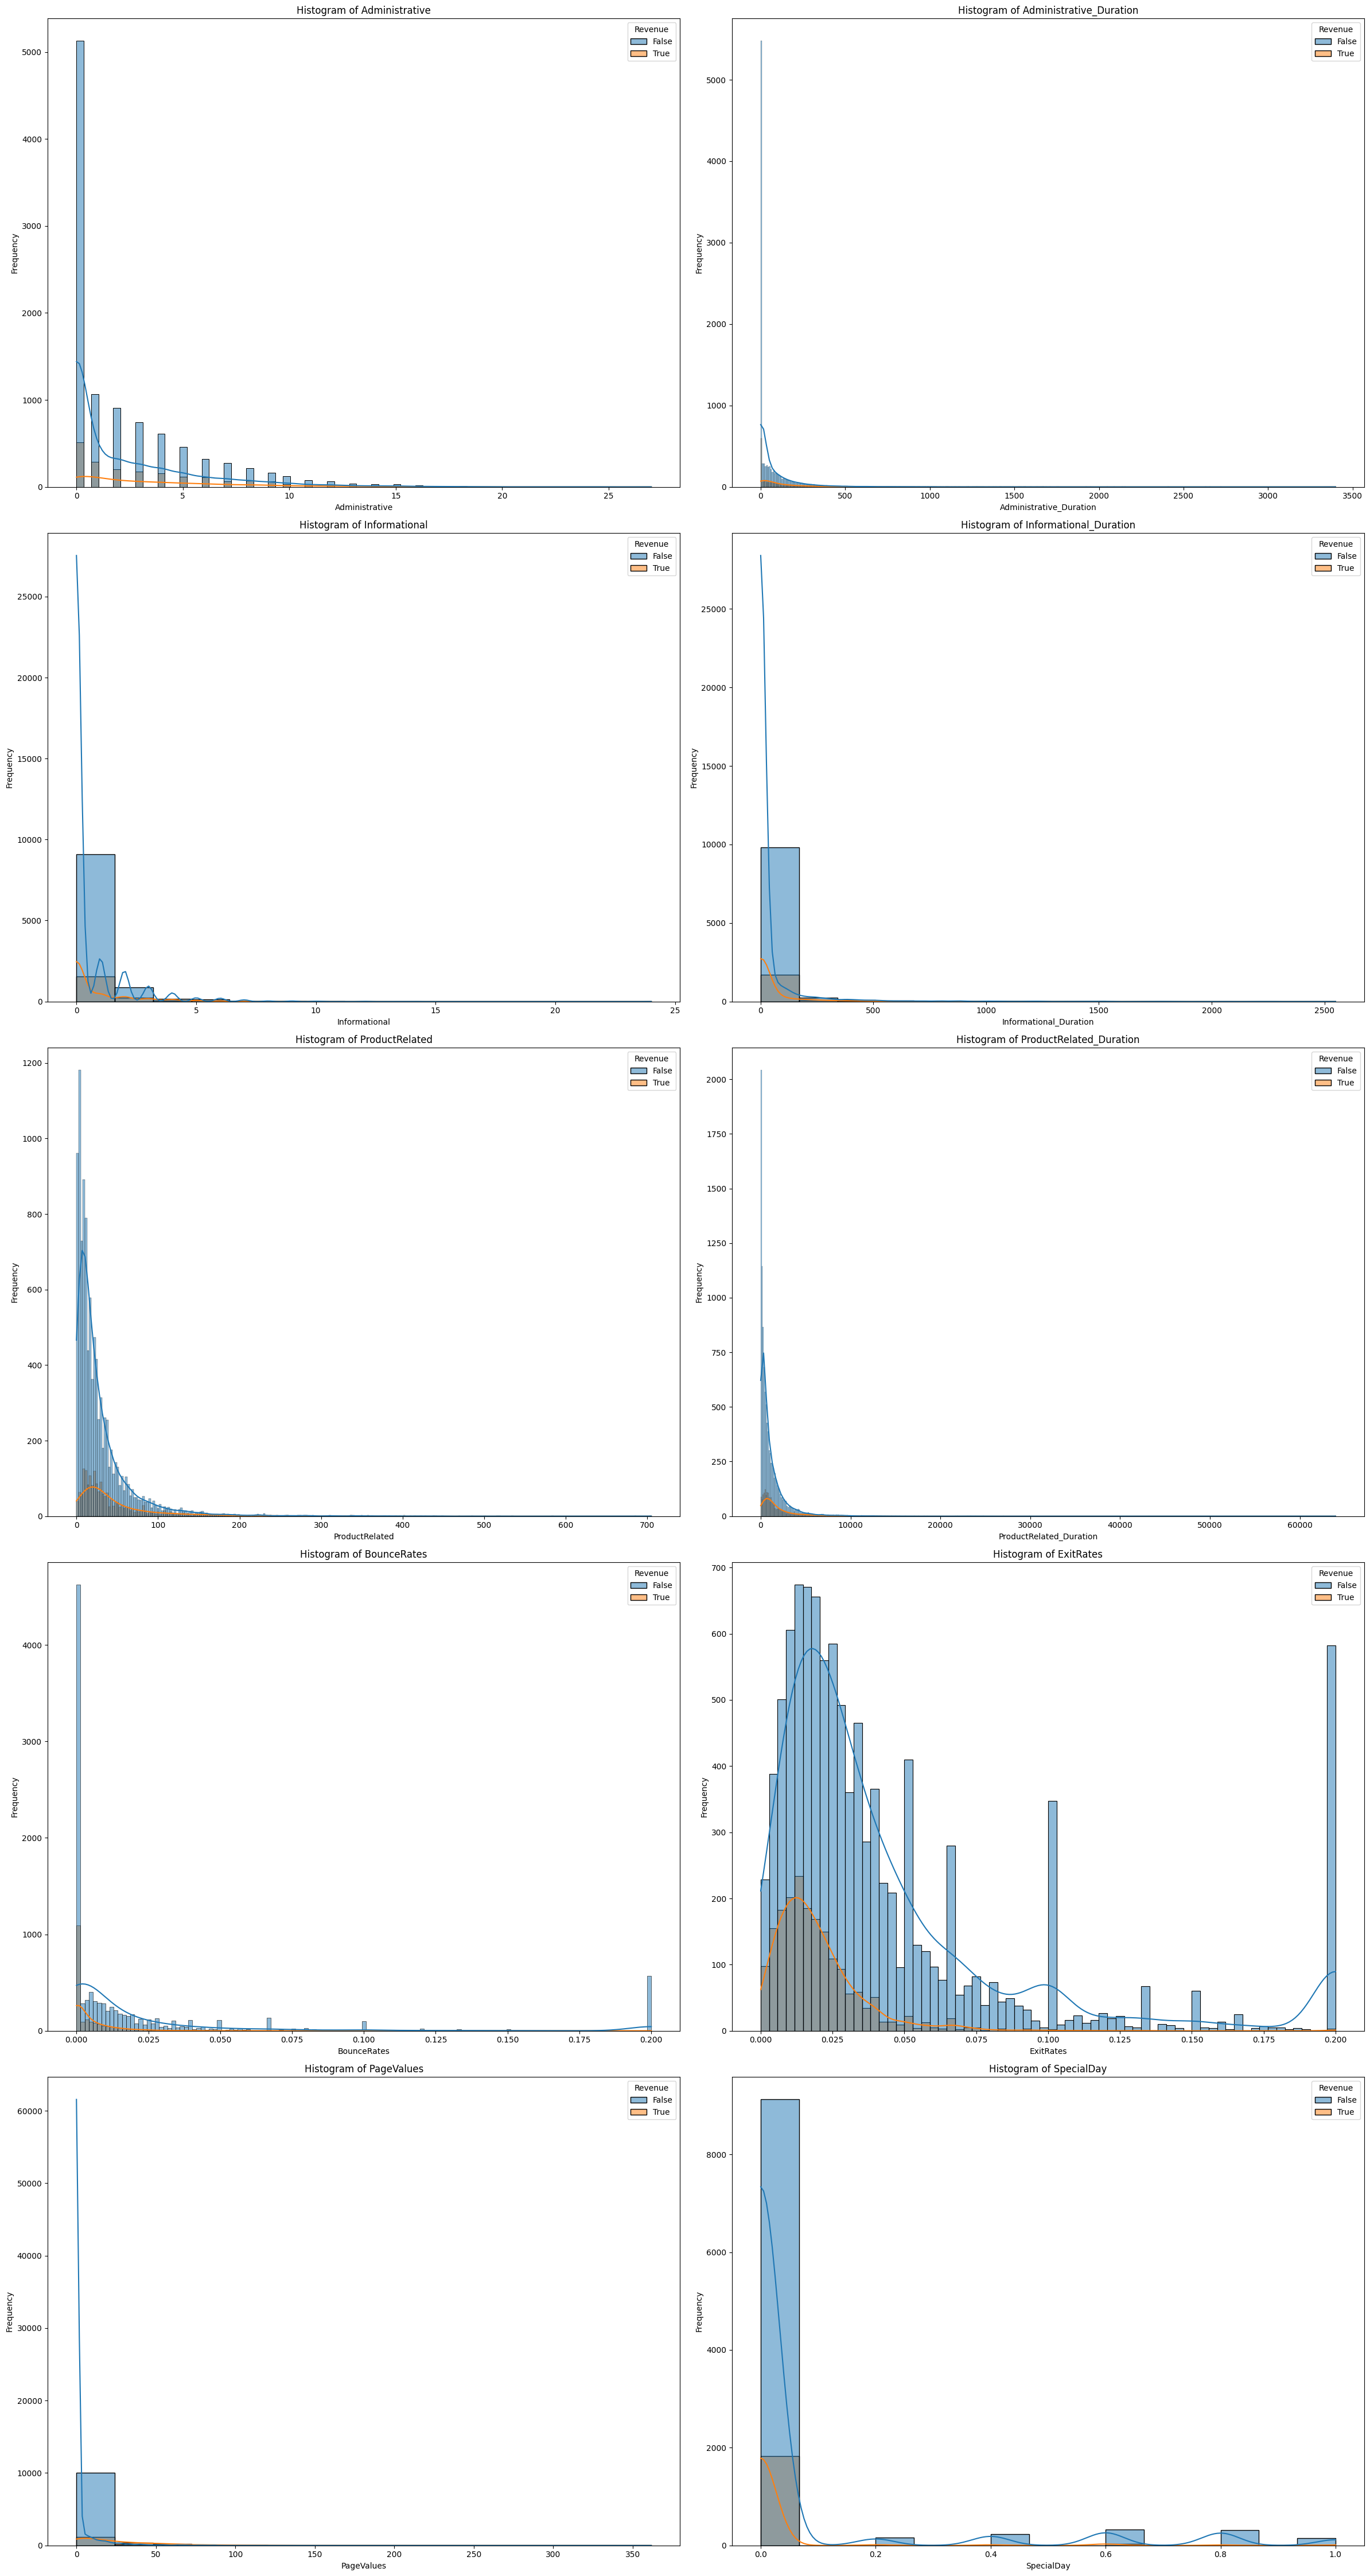

In [11]:
# histogram of the numerical columns
fig, ax = plt.subplots(5, 2, figsize=(24, 45))
for col, ax in zip(df.select_dtypes('number').columns, ax.flatten()):
    sns.histplot(data = df, x = col, kde=True, hue = "Revenue" , ax=ax)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()


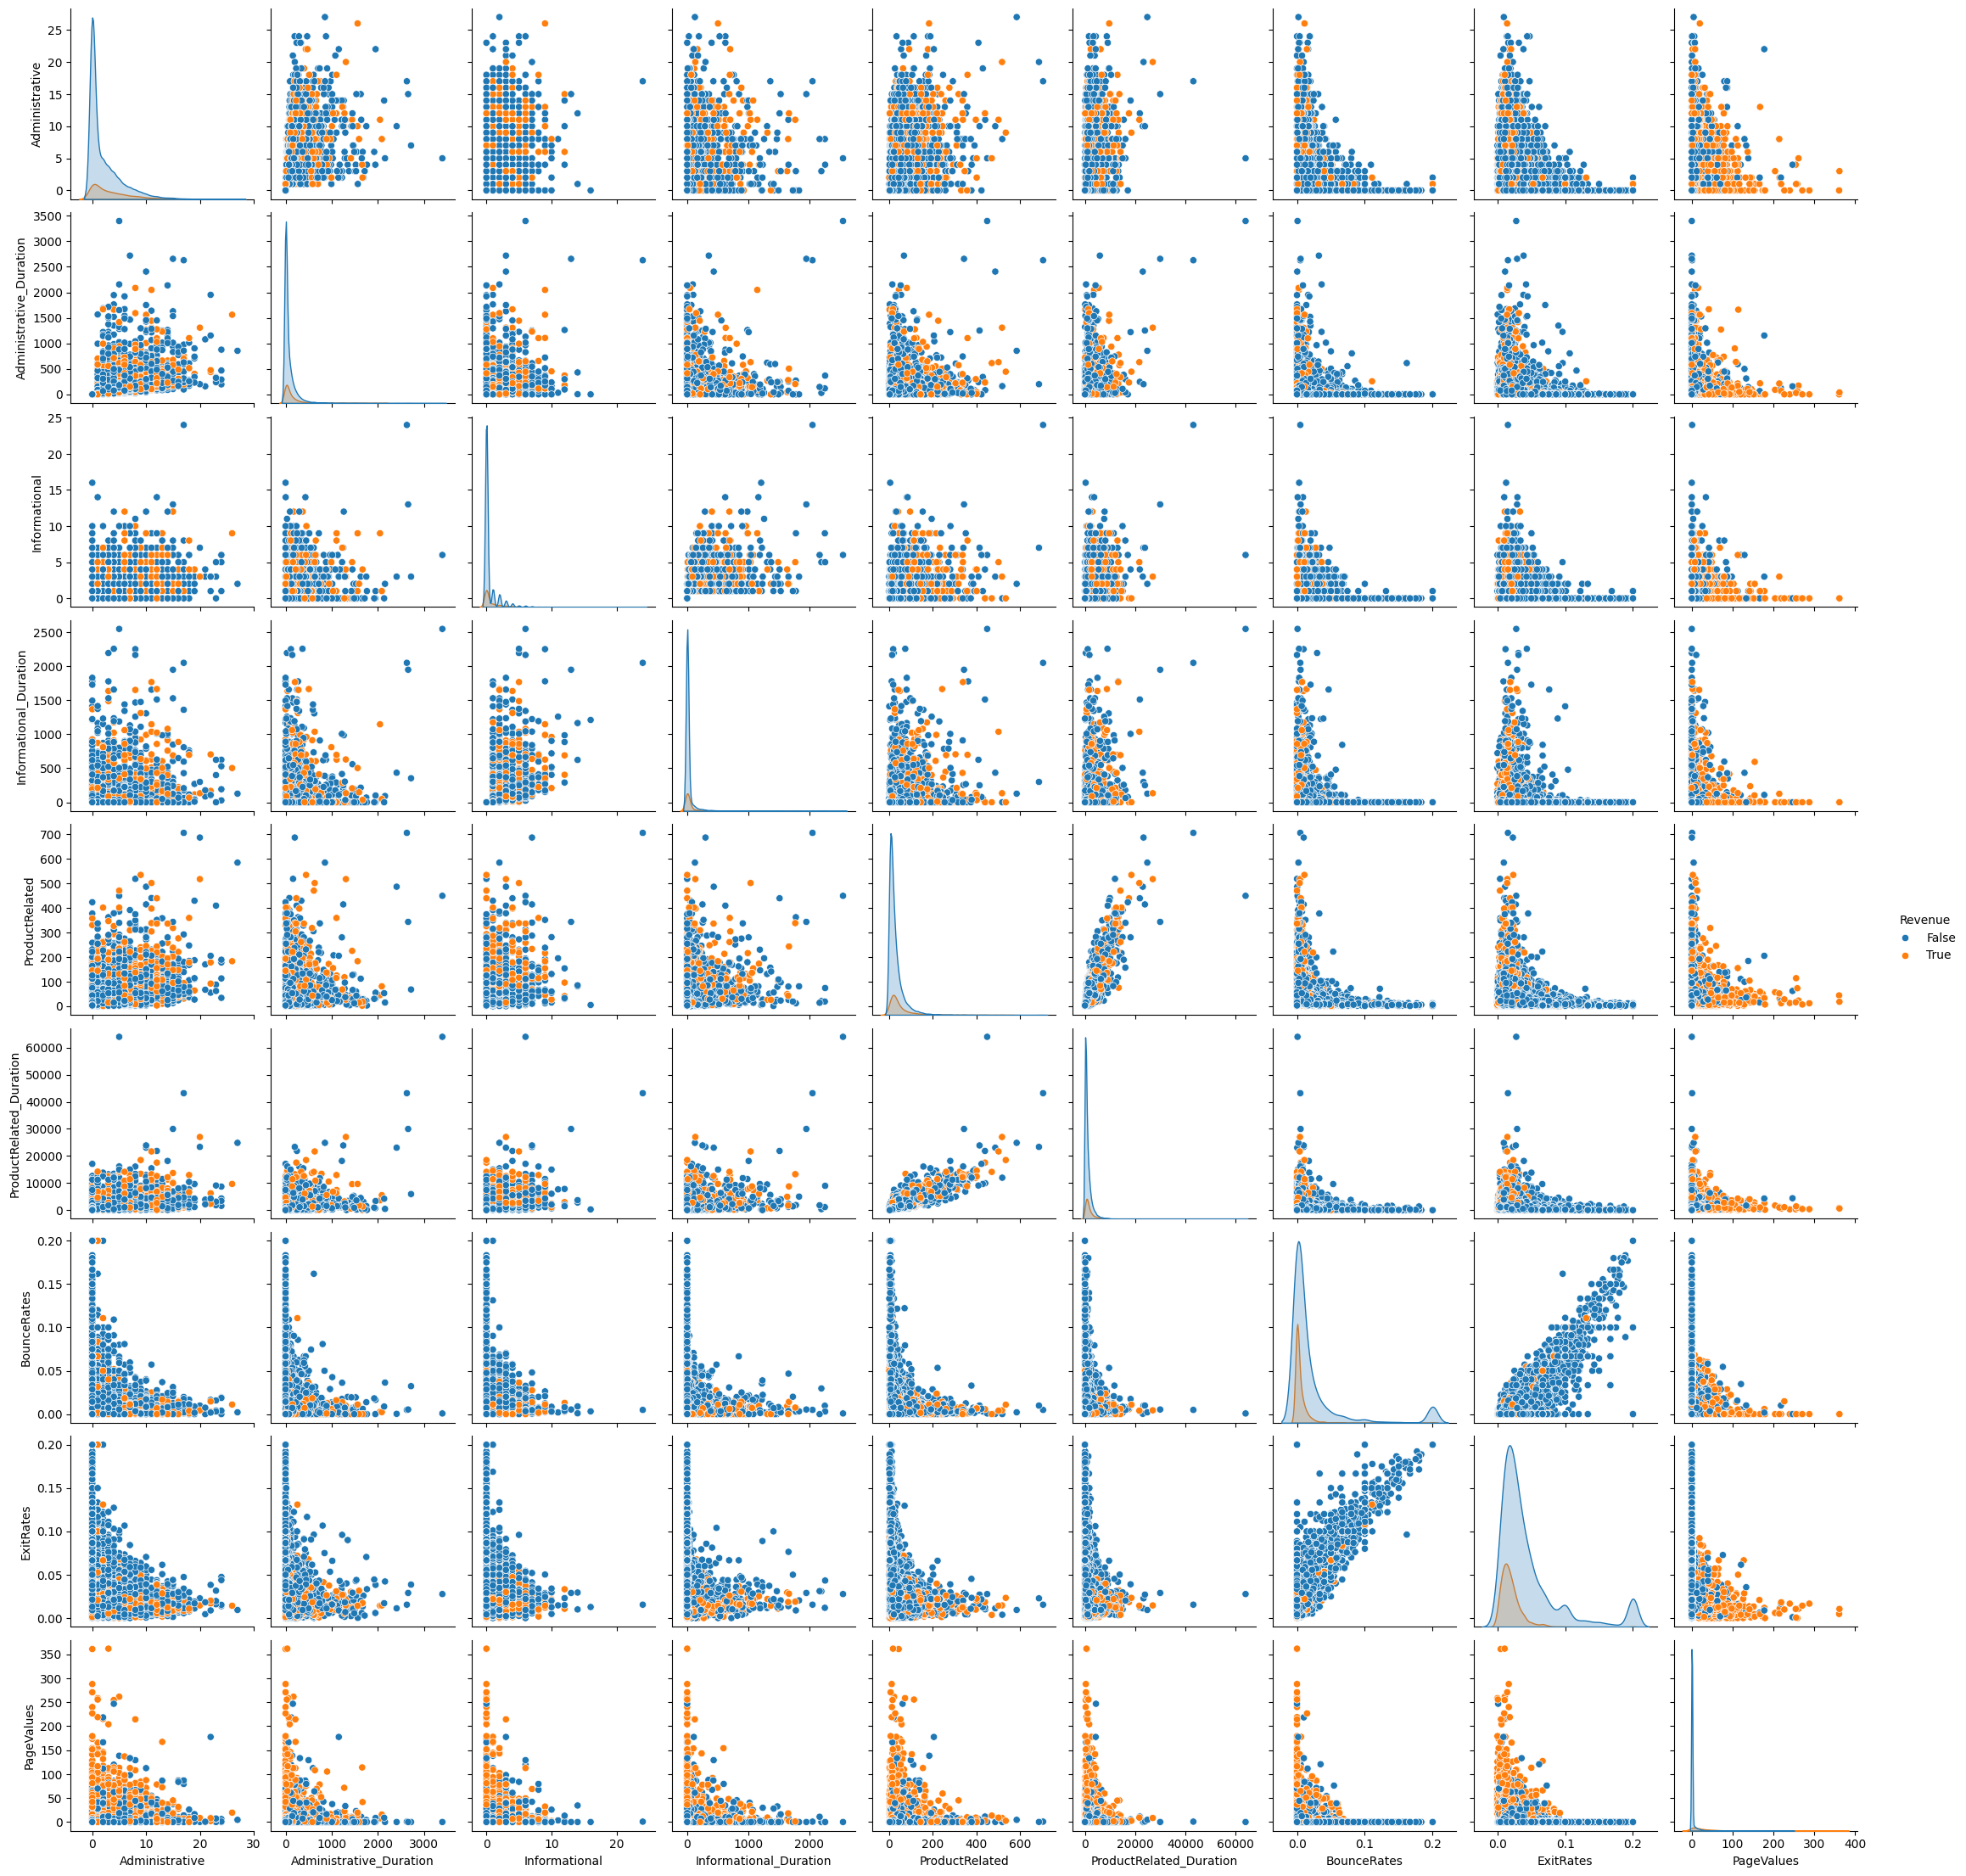

In [12]:
#pairplot only of the numerical columns
sns.pairplot(df[df.select_dtypes('number').columns.tolist()+['Revenue']].drop('SpecialDay', axis=1), hue='Revenue')
plt.show()

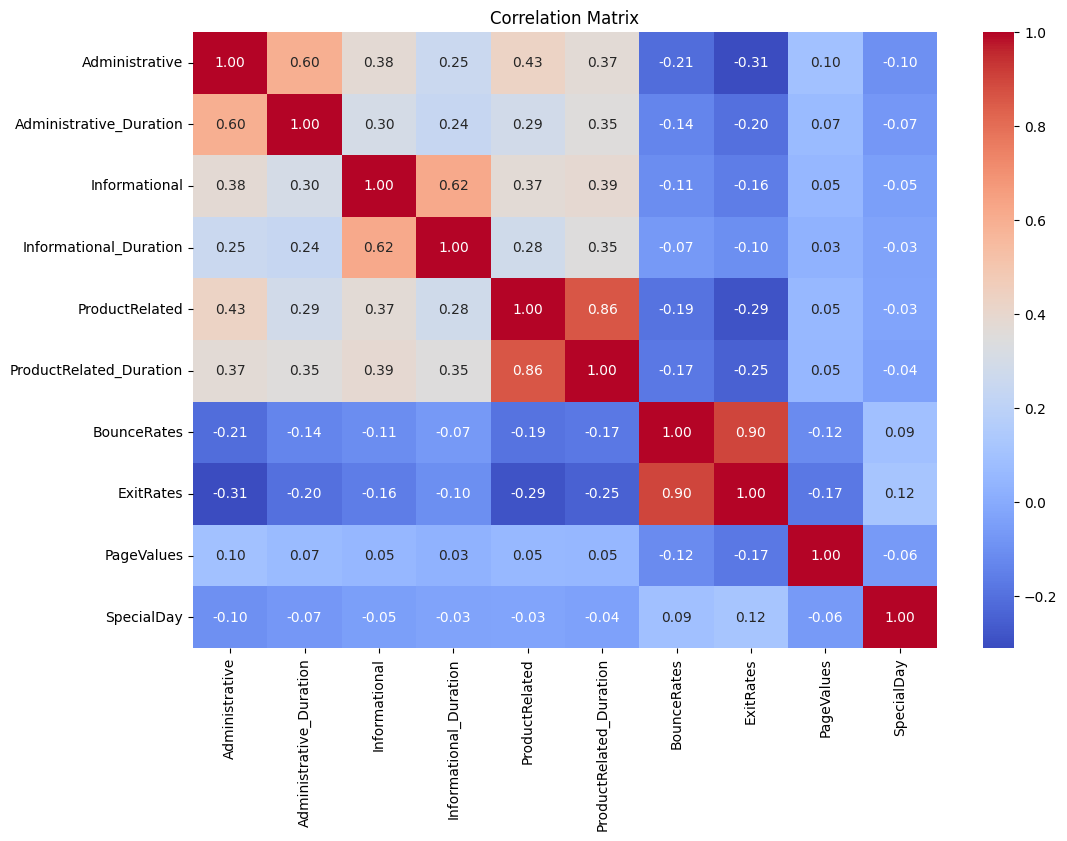

In [13]:
# plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [59]:
cat_cols = df.drop('Revenue', axis=1).select_dtypes(['object', 'bool']).columns.tolist()
num_cols = df.drop('Revenue', axis=1).select_dtypes('number').columns.tolist()


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])


In [60]:
target = 'Revenue'

# Split data into features and target
X = df.drop(target, axis=1)
y = df[target]

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Define the model
model = LogisticRegression()

# Create and train the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Training the model
pipeline.fit(X_train, y_train)
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues',
                                                   'SpecialDay']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Month', 'OperatingSystems',
                                                   'Browser', 'Region',
                                                   'TrafficType', 'VisitorType',
                                                   'Weekend'])])),
                ('model', LogisticRegression())])

In [62]:
# Predicting on test data
y_pred = pipeline.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test,y_pred)
report = classification_report(y_test, y_pred)

In [63]:
print('The test accuracy is : ', accuracy)
print('The test balanced accuracy is : ', balanced_accuracy)
print(report)

The test accuracy is :  0.889389594428513
The test balanced accuracy is :  0.6772632932853927
              precision    recall  f1-score   support

       False       0.90      0.98      0.94      2079
        True       0.76      0.38      0.50       362

    accuracy                           0.89      2441
   macro avg       0.83      0.68      0.72      2441
weighted avg       0.88      0.89      0.87      2441



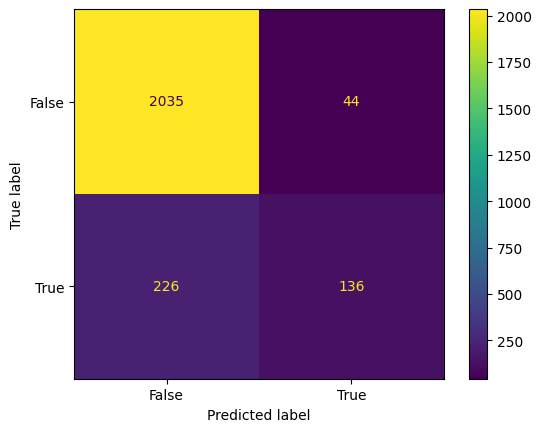

In [64]:

cm = confusion_matrix(y_test, y_pred, labels=pipeline[1].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline[1].classes_)
disp.plot()
plt.show()

In [66]:
cat_cols

['Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend']